In [1]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /content/sample_data/rockpaperscissors.zip


--2020-07-14 07:03:10--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/content/sample_data/rockpaperscissors.zip’

/content/sample_dat 100%[===================>] 307.92M  19.0MB/s    in 17s     

2020-07-14 07:03:27 (18.0 MB/s) - ‘/content/sample_data/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
import zipfile

zip_ref = zipfile.ZipFile("/content/sample_data/rockpaperscissors.zip")
zip_ref.extractall("/content/sample_data")
zip_ref.close()

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import os
train_dir = '/content/sample_data/rockpaperscissors/rps-cv-images/'


In [5]:
#memberi augmentasi dan membagi validasi data sebesar 30% dari train data
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5,validation_split=0.3
                    )


In [6]:
train_generator = datagen.flow_from_directory(subset='training',
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(200, 300),
                                                class_mode='categorical',batch_size=32)

val_generator = datagen.flow_from_directory(
    directory=train_dir,subset='validation',target_size=(200, 300),class_mode='categorical',shuffle=True,batch_size=32,)

Found 1533 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [8]:
sample_training_images, _ = next(train_generator)

In [9]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

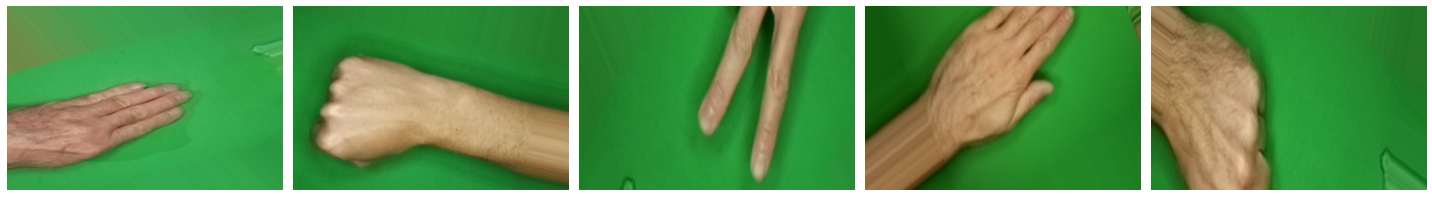

In [10]:
plotImages(sample_training_images[:5])


In [11]:
adam = Adam(lr=0.0001)
model.compile(optimizer= adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 33, 128)       1

In [13]:
checkpoint = ModelCheckpoint("/content/sample_data/suit.hdf5", monitor='val_accuracy', verbose=1,
                              save_best_only=True, mode='max',)
early_Stop = EarlyStopping(monitor='val_accuracy',patience=5,mode='max',verbose=1)

In [14]:
history = model.fit(
    train_generator,
    validation_data = val_generator, 
    epochs=10,callbacks=[checkpoint,early_Stop])

Epoch 1/10
48/48 [==============================] - ETA: 0s - loss: 1.0855 - accuracy: 0.3966
Epoch 00001: val_accuracy improved from -inf to 0.49313, saving model to /content/sample_data/suit.hdf5
48/48 [==============================] - 36s 756ms/step - loss: 1.0855 - accuracy: 0.3966 - val_loss: 1.0287 - val_accuracy: 0.4931
Epoch 2/10
48/48 [==============================] - ETA: 0s - loss: 0.9405 - accuracy: 0.5492
Epoch 00002: val_accuracy improved from 0.49313 to 0.69008, saving model to /content/sample_data/suit.hdf5
48/48 [==============================] - 35s 733ms/step - loss: 0.9405 - accuracy: 0.5492 - val_loss: 0.7774 - val_accuracy: 0.6901
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: 0.7289 - accuracy: 0.6810
Epoch 00003: val_accuracy improved from 0.69008 to 0.71145, saving model to /content/sample_data/suit.hdf5
48/48 [==============================] - 36s 741ms/step - loss: 0.7289 - accuracy: 0.6810 - val_loss: 0.6833 - val_accuracy: 0.7115
Epoc

Using TensorFlow backend.


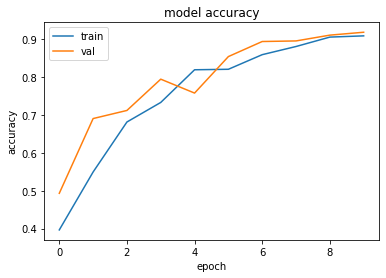

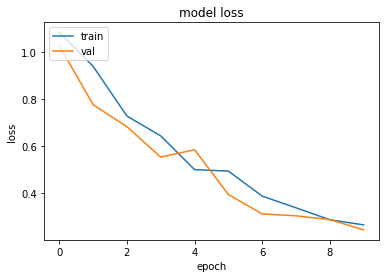

In [15]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 149, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 147, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 33, 128)       1

Saving 0657zSfiTYzP2jrl.png to 0657zSfiTYzP2jrl.png
['scissors']


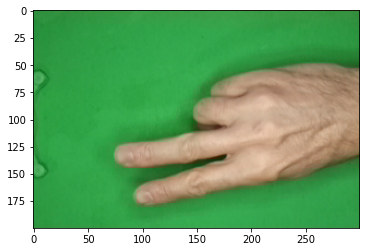

In [18]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(200,300))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  predicted_class_indices=np.argmax(classes,axis=1)
  labels = (train_generator.class_indices)
  labels = dict((v,k) for k,v in labels.items())
  predictions = [labels[k] for k in predicted_class_indices]
  print(predictions)